# Steps for Regression w Standardization

In [ ]:
Step 1: Import Libraries

In [ ]:
Step 2: Load Data

In [ ]:
Step 3: Preprocessing

In [ ]:
Step 4: Define Features and Target

In [ ]:
Step 5: Feature Scaling

In [ ]:
Step 6: Split into Training and Testing

In [ ]:
Step 7: Create Regression

In [ ]:
Step 8: Assess Model

In [ ]:
Step 9: Feature Weights and Bias

In [ ]:
Step 10: Testing

In [ ]:
Step 11: Export

-------------------------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------

# OUTLINE

# Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 2: Load Data 

In [ ]:
raw_data = pd.read_csv('')

# Explore Data

What is the meaning of each variable?

# Step 3: PREPROCESSING (Data Cleaning)

# Explore Descriptive Statistics

Look for outliers that may be skewing the data or missing values

In [ ]:
raw_data.describe(include='all')

# Drop Variables

In [ ]:
#when dropping variables, axis=0 means rows and axis=1 means columns
data = raw_data.drop([''], axis=1)
data.describe(include='all')

# Remove Missing Values

In [ ]:
#True = missing value, False = value present
data.isnull().head()

In [ ]:
#Since True is basically = 1, while False = 0, we can write
data.isnull().sum()
#which sums all the missing values

In [ ]:
data_no_mv = data.dropna(axis=0)

In [ ]:
data_no_mv.describe(include='all')

# Explore the Probability Distribution Functions (PDFs)

A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range

In [ ]:
sns.distplot(data_no_mv['feature'])

# Removing Outliers

One way to deal with outliers is to remove the top 1% of observations

In [ ]:
#use DataFrame.quantile(the quantile), which returns the value at the given quantile
#we want in this case to get the 99th percentile and keep the data below it
#q is a value we are creating
q = data_no_mv[''].quantile(0.99)

#next create a df in which we keep only those entries which are lower than the 99th percentile value
#the code is extremely reuseable
data_no_outliers = data_no_mv[data_no_mv['']<q]
data_no_outliers.describe(include='all')

# Reset Index

Currently, the indices in the df refer to all the data (including the observations we removed)

In [ ]:
data_cleaned = data_no_outliers.reset_index(drop=True)

# Check OLS Assumptions

# 1) Linearity

Explore relationships between the target (y) and each feature (x)
- if a relationship is not linear, a transformation or a non-linear regression may be necessary
- options: 1) Logistic regression 2) Logarithmic transformation 3) Exponential transformation

In [ ]:
plt.scatter(data_cleaned['feature_1'], data_cleaned['target'])
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

Log transformations:
- Semi-log 1 (make y a log, as x increases by 1 unit, y increases by b1 %)
- Semi-log 2 (make x a log, as x increases by 1 %, y increases by 1 unit)
- Log-log (make x and y logs, as x increases by 1 %, y increases by b1 %)

In [ ]:
log_feature_1 = np.log(data_cleaned['feature_1'])
log_target = np.log(data_cleaned['target'])

In [ ]:
plt.scatter(log_feature_1,log_target)
plt.xlabel('Log X')
plt.ylabel('Log Y')

# 2) No Endogeneity

Omitted Variable Bias:
- What variables could impact the dependent variable but are not included in the model?
- Are those variables likely correlated to the independent variables in the model?
- What is the sign of the correlation? Upward or downward bias?

# 3) Normality and Homoscedasticity

Normality is not a problem as long as we have a good amount of data

Homoscedasticity implies equal variance of the error term

Identifying Heteroscedasticity
- Plot Y against each of the Xs and look for patterns (ex. as the fitted value increases, variance increases)

Dealing with it
- Try a log transformation

# 4) No Autocorrelation

Is there serial correlation? (ex. day of the week effect on stock prices)
- Plot the data and look for patterns.
- If there is, cannot use linear regression model

# 5) No Multicollinearity

Do 2 or more variables have a high correlation?
- check correlation between variables

In [ ]:
dataset['Feature_1'].corr(dataset['Feature_2'])

Fixes?
- Drop one of the variables
- Transform them into one (i.e. avergae price)

In [ ]:
dataset.drop(['Feature'],axis=1)

# Step 4: Define Features and Target

In [ ]:
target = data_cleaned['target']
features = data_cleaned.drop(['target'],axis=1)

# Step 5: Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
#this will calculate the mean and std. dev of each feature and store it in the object 'scaler'
scaler.fit(features)

In [ ]:
#this transforms the x variables into standardized values
features_scaled = scaler.transform(features)

# Step 6: Split into Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=365)

# Step 7: Create Regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

In [ ]:
y_hat = reg.predict(x_train)

# Step 8: Asses the Model

# Plot predicted values against observed values

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Residual PDF

In [ ]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

# R-Squared

In [ ]:
reg.score(x_train,y_train)

# Step 9: Feature Weights and Bias

In [ ]:
summary_table = pd.DataFrame(features.columns.values, columns=['Features'])
summary_table['Weights'] = reg.coef_
summary_table

# Interpretation

The bigger the weight, the bigger the impact

# Step 10: Testing

In [ ]:
y_hat_test = reg.predict(x_test)

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Performance Data Frame

In [ ]:
performance = pd.DataFrame(y_hat_test, columns=['Predictions'])
performance.head()

In [ ]:
performance['Target'] = y_test
performance.head()

In [ ]:
performance['Residual'] = performance['Target'] - performance['Predictions']
performance['Difference%'] = np.absolute(performance['Residual']/performance['Target']*100)
performance.head()

# Testing outside data

In [ ]:
#dataset of x values you want to get predictions for
new_features = pd.read_csv('')

In [ ]:
#you need to standardize the new data
new_features_scaled = scaler.transform(new_features)

In [ ]:
#new dataset with the predictions
new_features['prediction'] = reg.predict(new_features_scaled)

# Step 11: Export

In [ ]:
performance.to_csv('C:\\location', index = False, header = True)

In [ ]:
new_features.to_csv('C:\\location', index = False, header=True)

----------------------------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------

# PRACTICAL EXAMPLE - Used Car Sales

# Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 2: Load Data

The dataset is based on used car sales data

We want to predict the price of a used car based on its specifications

In [3]:
raw_data = pd.read_csv('C:\\Users\\feder\\Downloads\\1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Explore the Data

Categorical Variables
- Brand - a BMW is generally more expensive than a Toyota
- Body - a smaller sedan may be cheaper than a large SUV
- Engine Type - an electic car may be more expesive than gas
- Registration - an unregistered car may be less expensive
- Model - higher end models are more expensive

Numerical Variables
- Mileage - the more miles a car has, the cheaper it should be
- Engine Volume - sports cars have larger engines and economy cars have smaller enginers
- Year - older =  cheaper (excpetion = vintage cars)

# Step 3: Preprocessing (Data Cleaning)

# Explore Descriptive Statistics

In [4]:
#include='all' to get numerical and categorical values
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Looking at the count, each variables has a different number, implying that there are MISSING VALUES

Looking at 'unique' for categorical variables, 'Model' has 312 DISTINCT values, implying we would need more than 300 dummy
variables!
- we should drop it from the regression (a lot of its information can be gathered from 'Brand','Year', and 'EngineV' so we wont be losing too much variability)

'top' refers to the most common category that appears in each variable, while 'freq' refers to how may times it appears
- we can see that 'Registration' has 3947 'yes' entries out 4345 (thus it won't be a very useful variable)

# Drop Variables

In [5]:
#when dropping variables, axis=0 means rows and axis=1 means columns
data = raw_data.drop(['Model'], axis=1)
data = data.drop(['Registration'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


# Remove Missing Values

In [6]:
#True = missing value, False = value present
data.isnull().head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [7]:
#Since True is basically = 1, while False = 0, we can write
data.isnull().sum()
#which sums all the missing values

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

Rule of thumb: if you are removing <5% of the total observations for the variable, you are free to just remove all those with missing values

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


# Explore the Probability Distribution Functions (PDFs)

A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


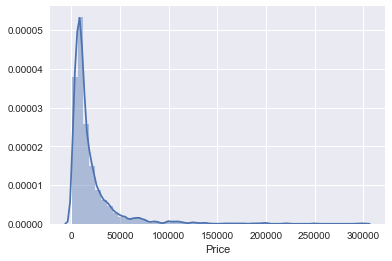

In [10]:
sns.distplot(data_no_mv['Price'])

We are looking for a normal distribution, but 'Price' has an exponential distribution

Take a look back at the descriptive statistics above:
- 'Price' has a mean or average of 19,552
- it has a min of 600
- 25% under 7,000
- 50% under 11,500
- 75% under 21,900
- but it has a max of 300,000 (which means we have some outliers that we should remove, or else they will inflate the results of the regression)

# Removing Outliers

One way to deal with outliers is to remove the top 1% of observations

In [11]:
#use DataFrame.quantile(the quantile), which returns the value at the given quantile
#we want in this case to get the 99th percentile and keep the data below it
#q is a value we are creating
q = data_no_mv['Price'].quantile(0.99)

#next create a df in which we keep only those entries of 'Price' which are lower than the 99th percentile value
#the code is extremely reuseable
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1528,NaN,NaN,1853,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000


Now plot the PDF for 'Price' again

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


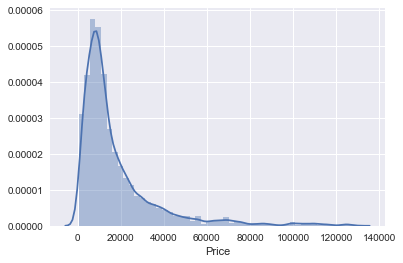

In [12]:
sns.distplot(data_1['Price'])

Check the PDFs of the other numerical variables

Mileage

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


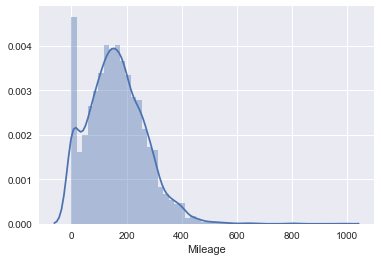

In [13]:
sns.distplot(data_no_mv['Mileage'])

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


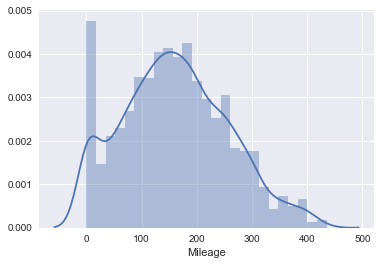

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

Engine Volume

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


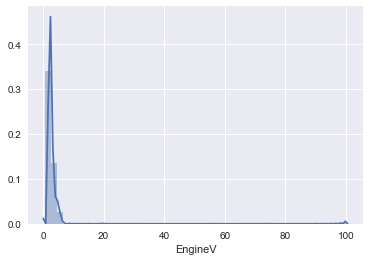

In [15]:
sns.distplot(data_no_mv['EngineV'])

Something weird is going on, Engine Volume should fall between 0.6 and 6.5, lets look at 'EngineV' individually

In [16]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV').tail()

,EngineV
1311,99.99
3114,99.99
1264,99.99
3641,99.99
256,99.99


We thus have a lot of incorrect data, so lets remove all observations that are above 6.5

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


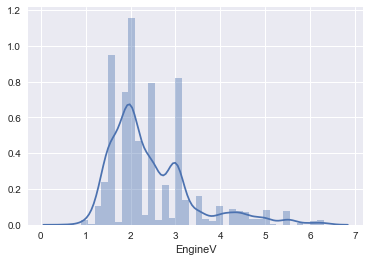

In [18]:
sns.distplot(data_3['EngineV'])

Year

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


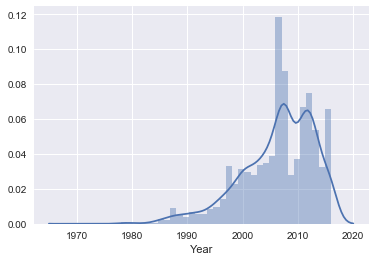

In [19]:
sns.distplot(data_no_mv['Year'])

The problem with year is that it is on the low end, most cars are newer but there seem to a few vintage cars

In [20]:
#this time take the 1st percentile and keep all observations that are higher
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


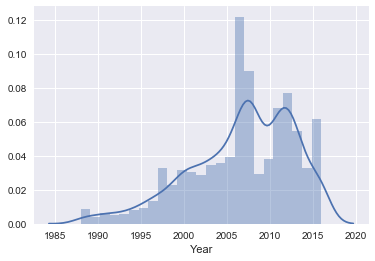

In [21]:
sns.distplot(data_4['Year'])

# Reset Index

Currently, the indices in the df refer to all the data (including the observations we removed)

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1467,NaN,NaN,1807,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


# Step 4: Check OLS Assumptions

# 1) Linearity

Plot scatter plots for each variable to assess what forms the relationships take

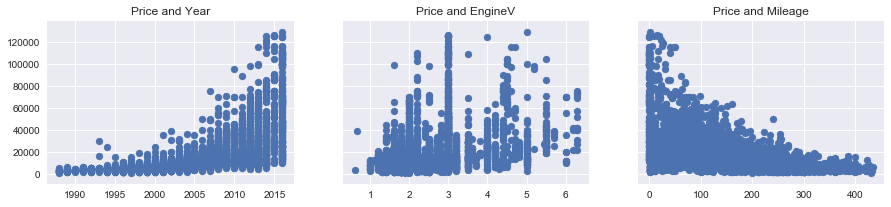

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can see that the relationships are non-linear, thus we need to transform variables

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


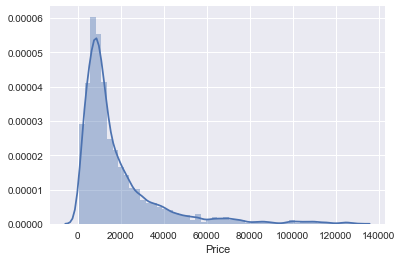

In [25]:
sns.distplot(data_cleaned['Price'])

Recall that 'Price' is not normally distributed so its relationships with the other normally distributed variables is non-linear, thus lets try taking the Log of 'Price'

# Log transformation

In [26]:
log_price = np.log(data_cleaned['Price'])
#add it as a new column to the end of the data frame
data_cleaned['log_price'] = log_price

In [27]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


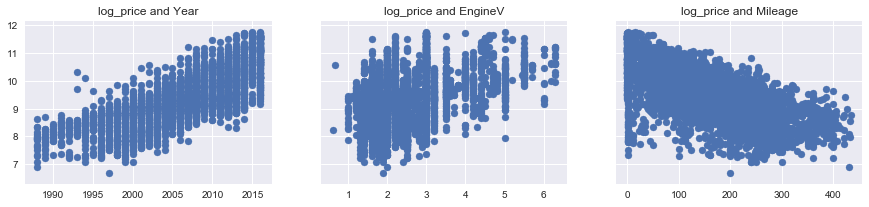

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

Now we can see linear relationships. New interpretation: as 'Year','EngineV', 'Mileage' increase by 1 unit, price increases by b1 %

We can also now drop the original 'Price' variables from the dataframe

In [29]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

# 2) No Endogeneity (Omitted Variable Bias)

Are there any variables that could effect the price of a used car that are not in the model?

After running the regression, take correlation between the residuals and each independent variable

# 3) Normality and Homoscedasticity

- normality is assumed for a big sample
- after our log transformation heteroscedasticity does not appear to be a problem

# 4) No Autocorrelation

- not a worry because our data is not time-series data or panel data

# 5) No Multicollinearity

One of the best ways to check for multicollinearity is through Variance Inflation Factor (VIF)
- VIF produces a measure which estimates how much larger the square root of the std. error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictos

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


- VIF = 1: No multicollinearity
- 1 < VIF < 5: good
- VIF > 10: not good

Year seems too correlated with the other variables so we should remove it

In [32]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

# Creating Dummy Variables

If we have N categories for a feature, we have to create N-1 dummies, or else we will introduce multicollinearity into the regression

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


# Rearrange

In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [35]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [36]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


# Step 5: Declare Features and Targets

In [37]:
target = data_preprocessed['log_price']
features = data_preprocessed.drop(['log_price'],axis=1)

# Step 6: Feature Scaling

In [38]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
features_scaled = scaler.transform(features)

# Step 7: Split into Training and Testing

In [40]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=365)

# Step 8: Create Regression

In [41]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
y_hat = reg.predict(x_train)

# Step 9: Assess the Model

# Plot predited values against observed values

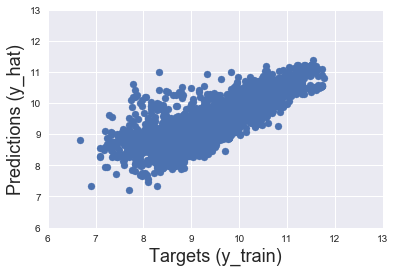

In [43]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Residual PDF

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Residuals PDF')

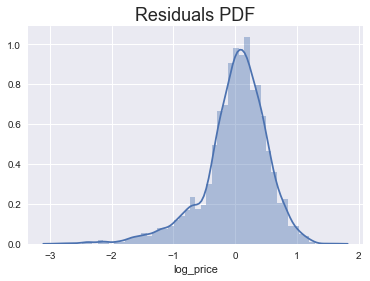

In [44]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

There seems to be a much large longer tail on the negative side
- there are certain observations for which the residual is much lower than the mean
- a much higher price is predicted than observed
- they overestimate the target

# R-Squared

In [45]:
reg.score(x_train,y_train)

0.6327932829432332

# Step 10: Feature Weights and Bias

In [46]:
reg.intercept_

9.416736021792213

In [47]:
reg.coef_

array([-0.51533512,  0.21967031,  0.02193221,  0.05613578, -0.11389539,
       -0.13005783, -0.02169288, -0.04189507, -0.16947147, -0.10072502,
       -0.22330322, -0.17441764, -0.13944436, -0.07458352, -0.03385346,
       -0.09429784])

# Summary Table

In [49]:
summary_table = pd.DataFrame(features.columns.values, columns=['Features'])
summary_table['Weights'] = reg.coef_
summary_table

,Features,Weights
0,Mileage,-0.515335
1,EngineV,0.219670
2,Brand_BMW,0.021932
3,Brand_Mercedes-Benz,0.056136
4,Brand_Mitsubishi,-0.113895
5,Brand_Renault,-0.130058
6,Brand_Toyota,-0.021693
7,Brand_Volkswagen,-0.041895
8,Body_hatch,-0.169471
9,Body_other,-0.100725


# Interpretation

Bigger the weight, the more impact is has
- Mileage is the most important feature, more than twice as important as Engine Volume
- It is negative, so as milage increases price decreases as we suspected

Continuous Variables
- A positive weight shows that as a feature increases in value, log_price and price increase (i.e. Engine Volume, as enginge volume increases price increases)
- A negative weight shows that as a feature increase in value, log_price and price decreases (i.e. Mileage, as mileage increases price decreases)

Dummy Variables
- A positive weight shows that the respective category (brand) is more expensive than the benchmark (Audi)
- i.e. BMW (0.021) is more expensive than Audi, while Toyota (-0.021) is less expensive than Audi

In [51]:
#Audi is not in the summary table because it is the benchmark to compare other brands to
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [52]:
#'Crossover' is the benchmark
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [53]:
#'Diesel' is the benchmark
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

# Step 11: Testing

In [55]:
y_hat_test = reg.predict(x_test)

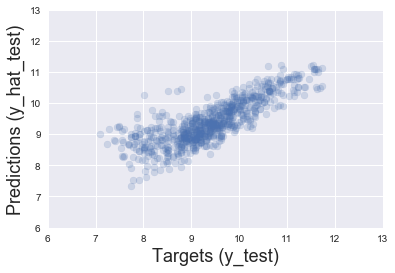

In [58]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Based on this plot it looks like most of the points are on the imaginary 45-degree line; however, the model is better at predicting higher prices than lower ones (cluster closer together at end of 45-degree line than beginning)

In [59]:
performance = pd.DataFrame(y_hat_test, columns=['Predictions'])
performance.head()

,Predictions
0,9.022921
1,9.213431
2,8.952672
3,8.868782
4,9.099009


In [60]:
#these are logs of price we can get price by taking the inverse of log, the exponential
# exp(ln(x)) = |x|, log(exp(x)) = x
performance = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
performance.head()

,Predictions
0,8290.962337
1,10030.951704
2,7728.513416
3,7106.617356
4,8946.423009


In [61]:
#reset index
y_test = y_test.reset_index(drop=True)

In [62]:
performance['Target'] = np.exp(y_test)
performance.head()

,Predictions,Target
0,8290.962337,2300.0
1,10030.951704,2800.0
2,7728.513416,2500.0
3,7106.617356,6400.0
4,8946.423009,9150.0


In [66]:
performance['Residual'] = performance['Target'] - performance['Predictions']
performance['Difference%'] = np.absolute(performance['Residual']/performance['Target']*100)
performance.head()

,Predictions,Target,Residual,Difference%
0,8290.962337,2300.0,-5990.962337,260.476623
1,10030.951704,2800.0,-7230.951704,258.248275
2,7728.513416,2500.0,-5228.513416,209.140537
3,7106.617356,6400.0,-706.617356,11.040896
4,8946.423009,9150.0,203.576991,2.224885


In [67]:
performance.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15560.322365,18165.817106,2605.494741,48.389560
std,12785.178475,19967.858908,11277.429072,79.150473
min,1534.536742,1200.000000,-31976.552299,0.099578
25%,7364.900478,6900.000000,-2340.797923,13.241638
50%,10989.862225,11600.000000,638.119126,27.328555
75%,19119.870780,20500.000000,3916.897156,48.155373
max,76166.153837,126000.000000,87273.596622,854.045645


- Max % difference was 854%
- 50% of data was under 27.32%

In [68]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
performance.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
258,11888.15,11900.00,11.85,0.10
23,12913.98,12900.00,-13.98,0.11
165,9389.32,9400.00,10.68,0.11
508,14953.31,15000.00,46.69,0.31
261,48364.18,48535.50,171.32,0.35
270,7728.32,7700.00,-28.32,0.37
438,17094.06,16999.00,-95.06,0.56
484,11667.91,11600.00,-67.91,0.59
446,8958.69,8900.00,-58.69,0.66
31,12748.39,12650.00,-98.39,0.78


It looks like the model was bad at predicting prices of used cars with targets that are very low (1,000 - 6,000 range)
- Note: most of the residuals for these predictions are negative (meaning the model overestimated)
- It could be that we are missing some piece of information such as whether the vehicle has been damaged or not

# How to Improve the model?

- Use a different set of variables
- Remove a bigger part of the outliers
- Use different kinds of transformations